# Large asymmetry test

We generate **N** galaxies with a varying size, magnitude, Sersic index, intrinsic asymmetry, sky magnitude, etc, and look at the behaviour of CAS and squared asymmetry metrics for these objects.

We draw each value of the following parameters from a uniform distribution with a min and a max value:

| Parameter | Min. | Max. |
| --- | --- | --- |
| Mag. | 10 | 16 |
| Sky RMS [mag/arcsec$^2$] | 20 | 26 |
| # clumps | 5 | 30 |
| PSF FWHM [arcsec] | 0 | 2 |
| Sersic n | 1 | 3 |

The radius of the generated galaxy is calculated as $-1.9 \textrm{mag} + 35$ arcsec, with a Gaussian scatter with $\sigma = 1.5$.

#### Imports

In [1]:
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
plt.style.use('/home/jovyan/work/liza/matplotlibrc')
plt.rcParams['font.size'] = 10
plt.rcParams['xtick.minor.size'] = 0#1.5
plt.rcParams['ytick.minor.size'] = 0#1.5
plt.rcParams['xtick.major.size'] = 2#3
plt.rcParams['ytick.major.size'] = 2#3
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['font.weight'] = 'light'

Read in all the pickle files with outputs for each generated galaxy:

In [8]:
# foldnames = [['var_mag1'], ['var_psf4', 'var_psf5', 'var_psf6'], ['var_all2', 'var_all3']]
# foldnames = [['var_skymag7'], ['var_psf4', 'var_psf5', 'var_psf6'], ['var_all2', 'var_all3']]
foldnames = [['var_mag3', 'var_mag4', 'var_mag5'], ['var_psf_new1'], ['var_apfrac2']]
data = []

for folders in foldnames:
    
    rows = []
    for folder in folders:
    
        files = []
        filenames = ! ls tests/{folder}
        for fn in filenames:    
            with open(f'tests/{folder}/{fn}', 'rb') as f:
                files.append(pickle.load(f))

        for f in files:
            f.pop('clump_properties')
            rows.append(f)
    
    df = pd.DataFrame(rows)
    data.append(df)
    
    
# data[1] = data[1][data[1].psf_fwhm <= 2]
data[0] = data[0].sample(n=1000, random_state=0)
# data[2] = data[2].dropna().sample(n=1000, random_state=0)

Instead, just read in the CSV with the data:

In [9]:
# data.to_csv('tests/data.csv', index=False)

Look at the distribution of CAS and squared asymmetry as a function of SNR

In [10]:
cmap = plt.get_cmap('YlGnBu')
cmap = cmap.from_list('custom', cmap(np.linspace(0.2,1,256)))
cmap2 = plt.get_cmap('OrRd_r')
cmap2 = cmap2.from_list('custom2', cmap2(np.linspace(0,0.9,256)))
# RdPu_r
cmap.set_under('#00000015')
# cmap.
# colors = cmap()
# cmap()

params = ['snr','psf_fwhm','ap_frac']
dfs = [data[0], data[1],data[2]]
mins = [0.99, 0.3, 1.05]
maxs = [10.8, 2.1, 2.59]
cmaps = [cmap, 'RdPu_r', cmap2]
cbar_labels = [
    r'$\langle$ SNR $\rangle$ per pixel',
    'PSF FWHM [arcsec]',
     r'Aperture size [R$_p$]'
]

s = 50
sizearr2 = data[2].snr*s
# sizearr2[sizearr2 > 100] = 150
sizearr = data[1].psf_fwhm*s
# sizearr[sizearr > 100] = 100
sizes = [s, s, s]
# arrowfracs = [0.12, 0, 0]


## CAS Asymmetry

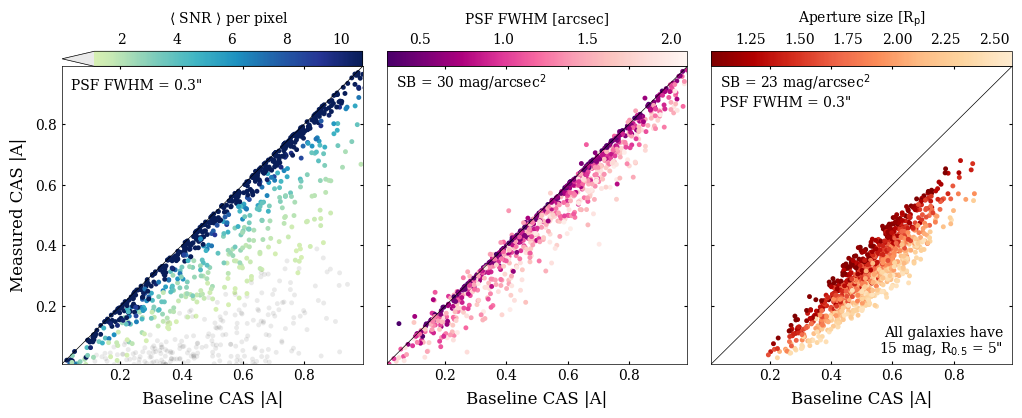

In [15]:
# data = data[data.snr > 10]

fig, axs = plt.subplots(1, 3, figsize=(9.5, 3.5), sharey=True)

for i, ax in enumerate(axs):
    
    df = dfs[i]
    col = params[i]
    im = ax.scatter(df.a_cas_real, df.a_cas, s=sizes[i], c=df[col], vmin=mins[i], vmax=maxs[i], cmap=cmaps[i]);
    if i == 0:
        c = fig.colorbar(im, ax=ax, extend='min', extendfrac=0.12, pad=0.0, 
                         orientation='horizontal', location='top')
    else:
        c = fig.colorbar(im, ax=ax,pad=0.0, orientation='horizontal', location='top')
    c.set_label(cbar_labels[i], labelpad=7)
    c.ax.tick_params(which='minor', size=0)
    c.ax.tick_params(which='major', size=0)
    
for ax in axs:
    ax.plot([0,1], [0,1], 'k', lw=0.5)
    ax.set_ylim(0.01,0.99); 
    ax.set_xlim(0.01,0.99)
    ax.set_xlabel('Baseline CAS |A|', size=12)

axs[0].set_ylabel('Measured CAS |A|', size=12)

# On the size plot, show relative sizes
axs[0].annotate('PSF FWHM = 0.3"', xy=(0.03, 0.96), xycoords='axes fraction', ha='left', va='top')
axs[1].annotate('SB = 30 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate('SB = 23 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate('PSF FWHM = 0.3"', xy=(0.03, 0.90), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate(r'All galaxies have', xy=(0.97, 0.08), xycoords='axes fraction', ha='right', va='bottom')
axs[2].annotate(r'15 mag, R$_{0.5}$ = 5"', xy=(0.97, 0.02), xycoords='axes fraction', ha='right', va='bottom')

# colors = plt.get_cmap(cmaps[1])([0.1,0.5,0.8])
# axs[1].scatter([0.73, 0.83, 0.925], 3*[0.11], transform=axs[1].transAxes, s=np.array([0.3,1.5,3])*s, c=colors)
# reslabels = ['0.3"', '1.5"', '3"']
# for i, (l, c) in enumerate(zip(reslabels, colors)):
#     axs[1].annotate(l, xy=(0.73+0.1*i, 0.03), xycoords='axes fraction', ha='center', va='bottom',
#                    color=c)


# Add a colorbar
plt.subplots_adjust(wspace=0.08)
# cax = fig.add_axes([0.97, 0, 0.02, 1])
# c = fig.colorbar(im, cax=cax)
# c.set_label(r'$\langle$ SNR $\rangle$ per pixel')

# plt.savefig('figures/cas_tests.pdf', bbox_inches='tight', pad_inches=0)

New version of this plot, this time with errors:

In [41]:
fig = plt.figure(figsize=(9.5, 4))

gs = fig.add_gridspec(2, 3,  width_ratios=(1, 1, 1), height_ratios=(3, 1),
                      left=0, right=1, bottom=0, top=1, wspace=0.12, hspace=0.0)

axs = []
for i in range(3):
    ax1 = fig.add_subplot(gs[0, i])
    ax2 = fig.add_subplot(gs[1, i], sharex=ax1)
    axs.append([ax1, ax2])
    
    # Measured vs baseline
    df = dfs[i]
    col = params[i]
    im = ax1.scatter(df.a_cas_real, df.a_cas, s=sizes[i], c=df[col], vmin=mins[i], vmax=maxs[i], cmap=cmaps[i]);
    
    # Error
    ax2.scatter(df.a_cas_real, df.a_cas-df.a_cas_real, s=sizes[i], c=df[col], vmin=mins[i], vmax=maxs[i], cmap=cmaps[i]);
    
    # Colorbar
    if i == 0:
        c = fig.colorbar(im, ax=ax1, extend='min', extendfrac=0.12, pad=0.0, 
                         orientation='horizontal', location='top')
    else:
        c = fig.colorbar(im, ax=ax1,pad=0.0, orientation='horizontal', location='top')
    c.set_label(cbar_labels[i], labelpad=7)
    c.ax.tick_params(which='minor', size=0)
    c.ax.tick_params(which='major', size=0)
    
axs = np.array(axs)
# Ticks etc
for i in range(3):
    axs[i][0].plot([0,1], [0,1], 'k', lw=0.5)
    axs[i][0].set_ylim(0.01,0.99); 
    axs[i][0].set_xlim(0.01,0.99)
    axs[i][1].plot([0,1],[0,0], 'k', lw=0.5)
    axs[i][1].set_ylim(-0.69, 0.2);
    axs[i][1].set_xlabel('Baseline CAS |A|', size=12)

Error in callback <function _draw_all_if_interactive at 0x7f17592e2170> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 950x400 with 9 Axes>

#### Corrected asymmetry (not needed)

In [7]:

# fig, axs = plt.subplots(1, 3, figsize=(9.5, 3.5), sharey=True)

# for i, ax in enumerate(axs):
    
#     df = dfs[i]
#     col = params[i]
#     im = ax.scatter(df.a_cas_real, df.a_cas_corr, s=sizes[i], c=df[col], vmin=mins[i], vmax=maxs[i], cmap=cmaps[i]);
#     if i == 0:
#         c = fig.colorbar(im, ax=ax, extend='min', extendfrac=0.12, pad=0.0, 
#                          orientation='horizontal', location='top')
#     else:
#         c = fig.colorbar(im, ax=ax,pad=0.0, orientation='horizontal', location='top')
#     c.set_label(cbar_labels[i], labelpad=7)
#     c.ax.tick_params(which='minor', size=0)
#     c.ax.tick_params(which='major', size=0)
    
# for ax in axs:
#     ax.plot([0,1], [0,1], 'k', lw=0.5)
#     ax.set_ylim(0.01,0.99); 
#     ax.set_xlim(0.01,0.99)
#     ax.set_xlabel(r'Baseline |A|$_{corr}$', size=12)

# axs[0].set_ylabel(r'Measured |A|$_{corr}$', size=12)

# # On the size plot, show relative sizes
# axs[0].annotate('PSF FWHM = 0.3"', xy=(0.03, 0.96), xycoords='axes fraction', ha='left', va='top')
# axs[1].annotate('SB = 30 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')
# axs[2].annotate('SB = 23 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')
# axs[2].annotate('PSF FWHM = 0.3"', xy=(0.03, 0.90), xycoords='axes fraction', ha='left', va='top')
# axs[2].annotate(r'All galaxies have', xy=(0.97, 0.08), xycoords='axes fraction', ha='right', va='bottom')
# axs[2].annotate(r'15 mag, R$_{0.5}$ = 5"', xy=(0.97, 0.02), xycoords='axes fraction', ha='right', va='bottom')

# colors = plt.get_cmap(cmaps[1])([0.1,0.5,0.8])
# # axs[1].scatter([0.73, 0.83, 0.925], 3*[0.11], transform=axs[1].transAxes, s=np.array([0.3,1.5,3])*s, c=colors)
# # reslabels = ['0.3"', '1.5"', '3"']
# # for i, (l, c) in enumerate(zip(reslabels, colors)):
# #     axs[1].annotate(l, xy=(0.73+0.1*i, 0.03), xycoords='axes fraction', ha='center', va='bottom',
# #                    color=c)

# # Add a colorbar
# plt.subplots_adjust(wspace=0.08)
# # cax = fig.add_axes([0.97, 0, 0.02, 1])
# # c = fig.colorbar(im, cax=cax)
# # c.set_label(r'$\langle$ SNR $\rangle$ per pixel')

# # plt.savefig('figures/cas_corr_tests.pdf', bbox_inches='tight')

### Squared asymmetry

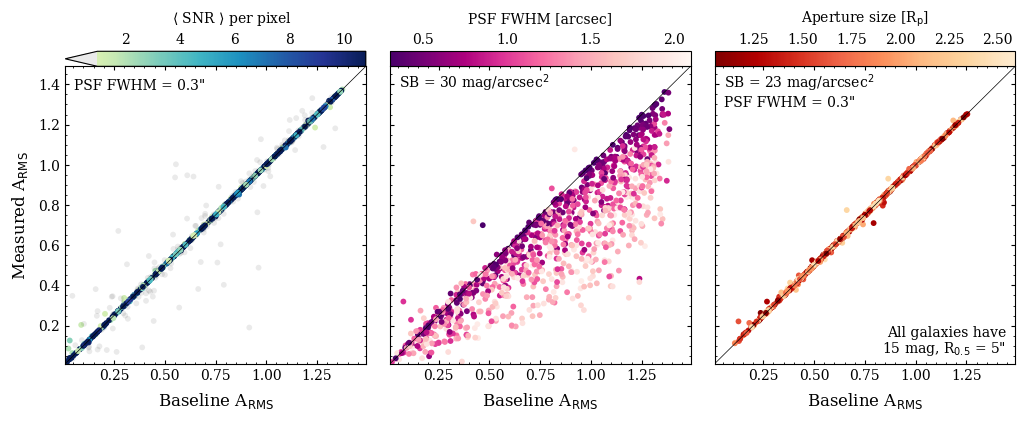

In [9]:

fig, axs = plt.subplots(1, 3, figsize=(9.5, 3.5), sharey=True)

for i, ax in enumerate(axs):
    
    df = dfs[i]
    col = params[i]
    im = ax.scatter(df.a_sq_real, df.a_sq, s=sizes[i], c=df[col], vmin=mins[i], vmax=maxs[i], cmap=cmaps[i]);
    if i == 0:
        c = fig.colorbar(im, ax=ax, extend='min', extendfrac=0.12, pad=0.0, 
                         orientation='horizontal', location='top')
    else:
        c = fig.colorbar(im, ax=ax,pad=0.0, orientation='horizontal', location='top')
    c.set_label(cbar_labels[i], labelpad=7)
    c.ax.tick_params(which='minor', size=0)
    c.ax.tick_params(which='major', size=0)
    
for ax in axs:
    ax.plot([0,3], [0,3], 'k', lw=0.5)
    ax.set_ylim(0.01,1.49); 
    ax.set_xlim(0.01,1.49)
    ax.set_xlabel(r'Baseline A$_{RMS}$', size=12)

axs[0].set_ylabel(r'Measured A$_{RMS}$', size=12)

# On the size plot, show relative sizes
axs[0].annotate('PSF FWHM = 0.3"', xy=(0.03, 0.96), xycoords='axes fraction', ha='left', va='top')
axs[1].annotate('SB = 30 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate('SB = 23 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate('PSF FWHM = 0.3"', xy=(0.03, 0.90), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate(r'All galaxies have', xy=(0.97, 0.08), xycoords='axes fraction', ha='right', va='bottom')
axs[2].annotate(r'15 mag, R$_{0.5}$ = 5"', xy=(0.97, 0.02), xycoords='axes fraction', ha='right', va='bottom')

# colors = plt.get_cmap(cmaps[1])([0.1,0.5,0.8])
# axs[1].scatter([0.73, 0.83, 0.925], 3*[0.11], transform=axs[1].transAxes, s=np.array([0.3,1.5,3])*s, c=colors)
# reslabels = ['0.3"', '1.5"', '3"']
# for i, (l, c) in enumerate(zip(reslabels, colors)):
#     axs[1].annotate(l, xy=(0.73+0.1*i, 0.03), xycoords='axes fraction', ha='center', va='bottom',
#                    color=c)

# Add a colorbar
plt.subplots_adjust(wspace=0.08)
# cax = fig.add_axes([0.97, 0, 0.02, 1])
# c = fig.colorbar(im, cax=cax)
# c.set_label(r'$\langle$ SNR $\rangle$ per pixel')
# 
# plt.savefig('figures/rmsa_tests.pdf', bbox_inches='tight', pad_inches=0)

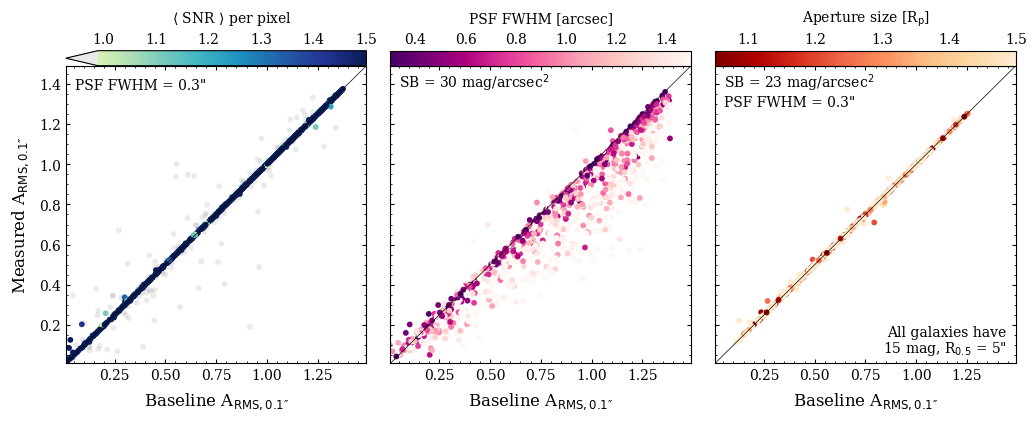

In [20]:
# data[2]['snr_eff'] = data[2].snr * (0.1/ data[2].pxscale)
# params = ['snr','psf_fwhm','snr_eff']
# # params = ['snr','psf_fwhm','snr']
# cbar_labels = [
#     r'$\langle$ SNR $\rangle$ per pixel',
#     'PSF FWHM [arcsec]',
#      r'Effective $\langle$ SNR $\rangle$ per pixel'
# ]


fig, axs = plt.subplots(1, 3, figsize=(9.5, 3.5), sharey=True)

for i, ax in enumerate(axs):
    
    df = dfs[i]
    col = params[i]
    im = ax.scatter(df.a_sq_real, df.a_fourier, s=sizes[i], c=df[col], vmin=mins[i], vmax=maxs[i], cmap=cmaps[i]);
    if i == 0:
        c = fig.colorbar(im, ax=ax, extend='min', extendfrac=0.12, pad=0.0, 
                         orientation='horizontal', location='top')
    else:
        c = fig.colorbar(im, ax=ax,pad=0.0, orientation='horizontal', location='top')
    c.set_label(cbar_labels[i], labelpad=7)
    c.ax.tick_params(which='minor', size=0)
    c.ax.tick_params(which='major', size=0)
    
    
for ax in axs:
    ax.plot([0,3], [0,3], 'k', lw=0.5)
    ax.set_ylim(0.01,1.49); 
    ax.set_xlim(0.01,1.49)
    ax.set_xlabel('Baseline A$_{RMS, 0.1\u2033}$', size=12)

axs[0].set_ylabel("Measured A$_{RMS, 0.1\u2033}$", size=12)

# On the size plot, show relative sizes
axs[0].annotate('PSF FWHM = 0.3"', xy=(0.03, 0.96), xycoords='axes fraction', ha='left', va='top')
axs[1].annotate('SB = 30 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate('SB = 23 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate('PSF FWHM = 0.3"', xy=(0.03, 0.90), xycoords='axes fraction', ha='left', va='top')
axs[2].annotate(r'All galaxies have', xy=(0.97, 0.08), xycoords='axes fraction', ha='right', va='bottom')
axs[2].annotate(r'15 mag, R$_{0.5}$ = 5"', xy=(0.97, 0.02), xycoords='axes fraction', ha='right', va='bottom')

# colors = plt.get_cmap(cmaps[1])([0.1,0.5,0.8])
# axs[1].scatter([0.73, 0.83, 0.925], 3*[0.11], transform=axs[1].transAxes, s=np.array([0.3,1.5,3])*s, c=colors)
# reslabels = ['0.3"', '1.5"', '3"']
# for i, (l, c) in enumerate(zip(reslabels, colors)):
#     axs[1].annotate(l, xy=(0.73+0.1*i, 0.03), xycoords='axes fraction', ha='center', va='bottom',
#                    color=c)

# Add a colorbar
plt.subplots_adjust(wspace=0.08)
# cax = fig.add_axes([0.97, 0, 0.02, 1])
# c = fig.colorbar(im, cax=cax)
# c.set_label(r'$\langle$ SNR $\rangle$ per pixel')

plt.savefig('figures/rmsa_corr_tests.pdf', bbox_inches='tight', pad_inches=0)

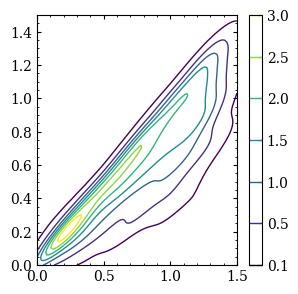

In [192]:
from scipy.stats import gaussian_kde
arr = df[['a_sq_real','a_sq']].values.T
kernel = gaussian_kde(arr, bw_method=0.3)

x = np.linspace(0,1.5,101)
y = np.linspace(0,1.5,101)
dx = np.diff(x)[0]
X, Y = np.meshgrid(x, y)

positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)
# Z *= 1000
# Z = Z*len(arr.T)/np.sum(Z)

plt.contour(X,Y,Z, levels=[0.1,0.5,1,1.5,2,2.5,3], linewidths=1)
# plt.contourf(Z)
plt.colorbar()

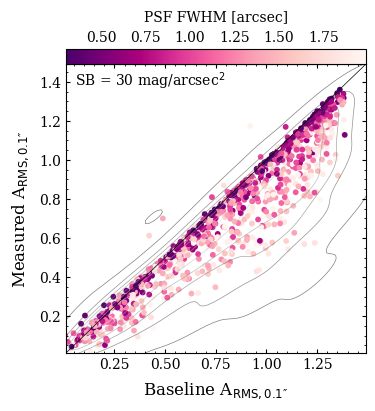

In [194]:
# data[2]['snr_eff'] = data[2].snr * (0.1/ data[2].pxscale)
# params = ['snr','psf_fwhm','snr_eff']
# # params = ['snr','psf_fwhm','snr']
# cbar_labels = [
#     r'$\langle$ SNR $\rangle$ per pixel',
#     'PSF FWHM [arcsec]',
#      r'Effective $\langle$ SNR $\rangle$ per pixel'
# ]


cmap = plt.get_cmap('RdPu_r')
fig, ax = plt.subplots(1, 1, figsize=(3, 3.4), sharey=True)

axs=[ax]

i=1
df = dfs[i]
col = params[i]

ax.contour(X,Y,Z, levels=[0.05,0.5,1,1.5,2,2.5,3], linewidths=0.5, cmap='gray', alpha=0.5)

im = ax.scatter(df.a_sq_real, df.a_fourier, s=sizes[i], c=df[col], vmin=mins[i], vmax=1.99, cmap=cmaps[i]);
c = fig.colorbar(im, ax=ax,pad=0.0, orientation='horizontal', location='top')
c.set_label(cbar_labels[i], labelpad=7)
c.ax.tick_params(which='minor', size=0)
c.ax.tick_params(which='major', size=0)
    
    
for ax in axs:
    ax.plot([0,3], [0,3], 'k', lw=0.5)
    ax.set_ylim(0.01,1.49); 
    ax.set_xlim(0.01,1.49)
    ax.set_xlabel('Baseline A$_{RMS, 0.1\u2033}$', size=12)

axs[0].set_ylabel("Measured A$_{RMS, 0.1\u2033}$", size=12)

# On the size plot, show relative sizes

ax.annotate('SB = 30 mag/arcsec$^2$', xy=(0.03, 0.98), xycoords='axes fraction', ha='left', va='top')


# colors = plt.get_cmap(cmaps[1])([0.1,0.5,0.8])
# axs[1].scatter([0.73, 0.83, 0.925], 3*[0.11], transform=axs[1].transAxes, s=np.array([0.3,1.5,3])*s, c=colors)
# reslabels = ['0.3"', '1.5"', '3"']
# for i, (l, c) in enumerate(zip(reslabels, colors)):
#     axs[1].annotate(l, xy=(0.73+0.1*i, 0.03), xycoords='axes fraction', ha='center', va='bottom',
#                    color=c)

# Add a colorbar
# plt.subplots_adjust(wspace=0.08)
# cax = fig.add_axes([0.97, 0, 0.02, 1])
# c = fig.colorbar(im, cax=cax)
# c.set_label(r'$\langle$ SNR $\rangle$ per pixel')

plt.savefig('figures/rmsa_corr_res_only.pdf', bbox_inches='tight', pad_inches=0)

# ax.set_aspect('equal')